In [1]:
import os
import sys
import numpy as np
import neuron
from neuron import h
from neuron.units import ms, mV
from neuron import gui
from matplotlib import pyplot as plt
import csv
from math import exp, log
import scipy
from collections import Counter

In [2]:
h.load_file("import3d.hoc")
morphology_file = "morphologies/cell1.asc"
h.load_file("L5PCbiophys3G.hoc")
h.load_file("L5PCtemplate_2.hoc")
L5PC = h.L5PCtemplate(morphology_file)
h.celsius = 37
v_rest = -78

845.34678 
845.34678 
845.34678 


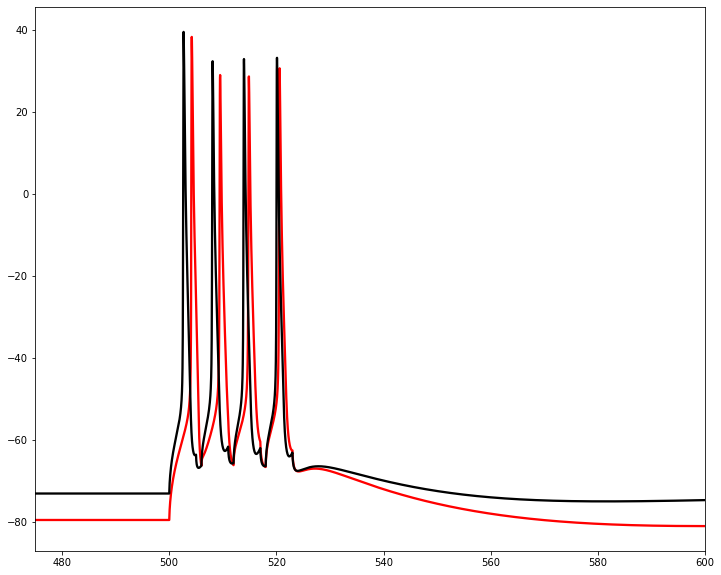

In [3]:
def Na_Flow():
    """figure 1 of Larkum 1999, showing non-linearity"""
    plt.rcParams['figure.figsize'] = [12,10]      
    vshift = -30
    interval = 6
    colors = ['red','black'] #,'green','blue','purple'
    for x in colors: 
        apic_secs = list(L5PC.apic)
        for sec in apic_secs:
            for seg in sec:
                try: seg.Ih.vshift = seg.Ih.vshift + 20
                except AttributeError: continue    
        vshift = vshift+20         

        t = h.Vector().record(h._ref_t)
        som_v = h.Vector().record(L5PC.soma[0](0.5)._ref_v)


        current_som = h.IClamp(L5PC.soma[0](0.5))
        current_som.delay = 500
        current_som.dur = 5 
        current_som.amp = 1.7
        
        current_som1 = h.IClamp(L5PC.soma[0](0.5))
        current_som1.delay = 500 + interval
        current_som1.dur = 5 
        current_som1.amp = 1.7
        
        current_som2 = h.IClamp(L5PC.soma[0](0.5))
        current_som2.delay = 500 + 2*interval
        current_som2.dur = 5 
        current_som2.amp = 1.7
        
        current_som3 = h.IClamp(L5PC.soma[0](0.5))
        current_som3.delay = 500 + 3*interval
        current_som3.dur = 5 
        current_som3.amp = 1.7


        soma_cur = h.Vector().record(current_som._ref_i)

        v_rest = -80.28
        h.finitialize(v_rest*mV)
        h.continuerun(800*ms)


        plt.plot(t, som_v, x, linewidth=2.3, label=vshift)
        plt.xlim([475, 600])

    plt.show()


Na_Flow()